In [31]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [3]:
#read data, simple transforms
df = pd.read_csv("../Data/WorkingDataSet_3-16-2016.csv", low_memory=False)
df.ix[:,22] =  pd.to_datetime(df.ix[:,22], infer_datetime_format=True)
df['First New Reservation Request Date Year'] = df.ix[:,22].dt.year

In [4]:
#df.head
#df.describe()
#df.columns
#data for San Jose
sj_df = df[df.ix[:,18] == "San Jose"].copy()

In [10]:
#SEI in San Jose
sei_names_sj = sj_df.ix[:,44]
sei_n_projects = sei_names_sj.value_counts()

In [12]:
#transform to the date format
sj_df.ix[:,22] =  pd.to_datetime(sj_df.ix[:,22], infer_datetime_format=True)
#see time range
#sj_df.ix[:,22].min()
#sj_df.ix[:,22].max()
#take year only
sj_df['First New Reservation Request Date Year'] = sj_df.ix[:,22].dt.year

In [14]:
#select project for the biggest SEI
#sei_df = sj_df[sj_df.ix[:,44] == "PETERSEN-DEAN INC. dba PETERSENDEAN"] - direct call
sei_df = sj_df[sj_df.ix[:,44] == sei_n_projects.index[0]]

In [15]:
#number of projects per year
sei_df['First New Reservation Request Date Year'].value_counts()

2011.0    475
2012.0    337
2010.0    279
2013.0     68
2008.0      2
2007.0      2
Name: max date year, dtype: int64

In [12]:
#type of a project
project_types_sj = sj_df.ix[:,2]
project_types_sj.value_counts()

Small Commercial (< 10 kW) and All Residential    4615
Large Commercial (>= 10 kW)                        247
Single-family Affordable Solar Homes                93
Multifamily Affordable Solar Housing                29
Name: Program, dtype: int64

In [11]:
#type of a project
project_types_sj = sj_df.ix[:,15]
project_types_sj.value_counts()

Residential    2522
Commercial     2326
Government       87
Non-Profit        9
Name: System Owner Sector, dtype: int64

In [13]:
#type of a project
project_types_sj = sj_df.ix[:,17]
project_types_sj.value_counts()

Residential    4718
Government      140
Commercial      109
Non-Profit       17
Name: Host Customer Sector, dtype: int64

In [17]:
#column names 
i = 0
for column in sj_df.columns:
    print((i, column))
    i += 1

(0, 'Application Number')
(1, 'Program Administrator')
(2, 'Program')
(3, 'Incentive Design')
(4, 'Incentive Type')
(5, 'Incentive Step')
(6, 'Incentive Amount')
(7, 'Total Cost')
(8, 'Nameplate Rating')
(9, 'CEC PTC Rating')
(10, 'Design Factor')
(11, 'CSI Rating')
(12, 'Current Incentive Application Status')
(13, 'Cancellation Reason')
(14, 'Host Customer NAICS Code')
(15, 'System Owner Sector')
(16, 'System Owner NAICS Code')
(17, 'Host Customer Sector')
(18, 'Host Customer Physical Address City')
(19, 'Host Customer Physical Address County')
(20, 'Host Customer Physical Address State')
(21, 'Host Customer Physical Zip Code')
(22, 'First New Reservation Request Date')
(23, 'First Online Reservation Request Submitted Date')
(24, 'First Reservation Request Review Date')
(25, 'First Pending RFP Date')
(26, "First RFP Review (Gov't/Non-Profit only) Date")
(27, 'First Suspended - RFP Review Date')
(28, 'First Reservation Reserved Date')
(29, 'First Online Proof of Project Milestones Subm

In [21]:
#modules in use
module_types = sj_df['PV Module#1 Model']
module_types.value_counts()

SF160-24-M185B        259
MPE 185 MS 05         148
SPR-327NE-WHT-D       135
TSM-240PA05.08        129
ST175-1               125
YL230P-29b            120
SPR-230-WHT-U         117
TSM-240PA05           111
MPE 180 MS 05         105
LG255S1C-G2           104
ET-M572185B            99
YL240P-29b             91
SPR-230E-WHT-D         86
SPR-225-BLK-U          84
TSM-245PA05.18         83
KD210GX-LPU            67
SPR-225E-BLK-D         66
CS6P-250P              65
YL245P-29b             64
REC245PE (BLK)         63
KD205GX-LP             61
YL235P-29b             60
LG245S1C-G2            54
KD215GX-LPU            51
TSM-245PA05.08         51
SPR-215-WHT-U          50
SX3200B                43
STP185S-24/Adb+        41
STP175S-24/Ab-1        40
ND-240QCJ              38
                     ... 
ND-224U2                1
SPR-210-BLK             1
STP180-24/Ab-1          1
SCM215                  1
ET-P660250              1
SOLON Black 235         1
PVL-68                  1
STP285-24/Vd

In [22]:
#modules in use whole data set
df['PV Module#1 Model'].value_counts()

SPR-327NE-WHT-D                 9474
YL245P-29b                      4453
YL235P-29b                      3418
SPR-225-BLK-U                   3376
YL240P-29b                      3348
TSM-240PA05                     3107
SPR-230-WHT-U                   2892
LG255S1C-G2                     2637
REC245PE (BLK)                  2605
TSM-250PA05.18                  2493
STP185S-24/Adb+                 2491
YL230P-29b                      2456
TSM-245PA05.18                  2369
NU-U235F1                       2098
SPR-230E-WHT-D                  2025
YL250P-29b                      1892
SPR-225E-BLK-D                  1890
KD210GX-LPU                     1720
KD215GX-LPU                     1715
CS6P-250P                       1599
ND-240QCJ                       1550
SPR-215-WHT-U                   1518
STP190S-24/Adb+                 1388
SX3200B                         1301
ST175-1                         1227
ND-224UC1                       1180
CS6P-230P                       1127
E

In [4]:
#read data
df1 = pd.read_csv("../Data/NEM_CurrentlyInterconnectedDataset_2016-01-31.csv", low_memory=False)


In [5]:
#column labels
i = 0
for column in df1.columns:
    print((i, column))
    i += 1

(0, 'Application Id')
(1, 'Matched CSI Application Number')
(2, 'Utility')
(3, 'Service City')
(4, 'Service Zip')
(5, 'Service County')
(6, 'Technology Type')
(7, 'System Size DC')
(8, 'System Size AC')
(9, 'Tilt')
(10, 'Azimuth')
(11, 'Mounting Method')
(12, 'Tracking')
(13, 'Customer Sector')
(14, 'App Received Date')
(15, 'App Complete Date')
(16, 'App Approved Date')
(17, 'Self Installer')
(18, 'Installer Name')
(19, 'Installer Phone')
(20, 'Installer City')
(21, 'Installer State')
(22, 'Installer Zip')
(23, 'Third Party Owned')
(24, 'Third Party Owned Type')
(25, 'Third Party Name')
(26, 'Pace Financed')
(27, 'Pace Financier')
(28, 'Electric Vehicle')
(29, 'Electric Vehicle Count')
(30, 'System Output Monitoring')
(31, 'System Output Reports To Vendor?')
(32, 'System Output Monitoring Provider')
(33, 'Total System Cost')
(34, 'Itc Cost Basis')
(35, 'Previous Application')
(36, 'Previous Application Ids')
(37, 'Application Status')
(38, 'Project is VNEM, NEM-V, NEM-Agg?')
(39, 'VNE

In [6]:
#get year from date
df1.ix[:,15] =  pd.to_datetime(df1.ix[:,15], infer_datetime_format=True)
df1['App Complete Date Year'] = df1.ix[:,15].dt.year

In [10]:
#modules in use
df1[df1['App Complete Date Year'] > 2014]['Module Model 1'].value_counts()

REC260PE                16951
KU265-6ZPA               8206
YL255P-29b               6008
KU260-6XPA               5367
SPR-327NE-WHT-D          4211
SW 280 Mono Black        3841
SPR-E20-327              3605
REC260PE(BLK)            3113
YL250P-29b               2877
SPR-X21-345              2636
SW 285 Mono              2428
TSM-255PA05.18           1952
REC275TP                 1952
LG280S1C-B3              1915
SW 275 Mono Black        1519
LG305N1C-B3              1388
CS6P-260P                1334
CS6P-255P                1274
PM250M01_265             1179
SPR-230NE-BLK-D          1163
REC260PE Z-LINK          1144
SW250 Poly               1141
Q.PRO BFR - G3 260       1107
TSM-250PA05.05           1103
KU255-6XCA                993
TSM-260PD05.08            956
SW 280 mono               893
SW 280 Mono               865
TSM-250PA05.18            799
PM245P01_255              787
                        ...  
MEMC-M280AMA-20             1
REC290PE                    1
MVX250-60-

In [11]:
#biggest installers in 2015-2016
df1[df1['App Complete Date Year'] > 2014]['Installer Name'].value_counts()

SolarCity Corporation                    23535
SolarCity                                15855
Vivint Solar Developer, LLC.              5572
Vivint Solar Developer, LLC               3443
Sunrun Installation Services, Inc.        2785
SOLARCITY                                 2054
solarcity                                 2019
Sunrun Installation Services, Inc         1660
Baker Electric, Inc.                      1630
SunPower Corporation                      1581
Sullivan Solar Power                      1520
REC Solar, Inc.                           1482
Vivint Solar                              1446
Verengo                                   1397
Horizon Solar Power                       1361
Solcius                                   1281
Self Installer                            1087
Semper Solaris Construction Inc           1058
VIVINT SOLAR                               897
SolarCityMH                                896
Solar Service Center                       876
Lennar Homes/

In [18]:
#selection for SolarCity
solarcity_names = ['SolarCity Corporation', 'SolarCity', 'SolarCityMH', 'SOLARCITY', 'solarcity']
df1[(df1['App Complete Date Year'] > 2014) & (df1['Installer Name'].isin(solarcity_names))][['Installer Name']].count
df1[(df1['App Complete Date Year'] > 2014)][['Installer Name']].count

<bound method DataFrame.count of                             Installer Name
239     Talbott Solar & Radiant Homes Inc.
1913       SolarCity Corporation - Tiffany
1914       SolarCity Corporation - Tiffany
1915       SolarCity Corporation - Tiffany
1916       SolarCity Corporation - Tiffany
1919       SolarCity Corporation - Tiffany
1926       SolarCity Corporation - Tiffany
1929       SolarCity Corporation - Tiffany
1931       SolarCity Corporation - Tiffany
1938       SolarCity Corporation - Tiffany
1946       SolarCity Corporation - Tiffany
1947       SolarCity Corporation - Tiffany
1949       SolarCity Corporation - Tiffany
1951       SolarCity Corporation - Tiffany
1953       SolarCity Corporation - Tiffany
1955       SolarCity Corporation - Tiffany
1957       SolarCity Corporation - Tiffany
1962       SolarCity Corporation - Tiffany
1963       SolarCity Corporation - Tiffany
1964       SolarCity Corporation - Tiffany
1968       SolarCity Corporation - Tiffany
1970       SolarCity 

In [19]:
#number of projects over the years
df1['App Complete Date Year'].value_counts()

2015.0    138565
2014.0     98873
2013.0     65299
2012.0     38944
2011.0     17095
2010.0     14152
2009.0     11606
2016.0      8592
2008.0      7350
2007.0      7160
2006.0      5047
2004.0      3792
2005.0      3243
2003.0      2228
2002.0       670
2001.0       329
2000.0        86
1999.0         4
1998.0         4
1987.0         1
Name: App Complete Date Year, dtype: int64

In [20]:
#selection for SolarCity
ss_df = df1[(df1['App Complete Date Year'] > 2014) & (df1['Installer Name'].isin(solarcity_names))]

In [ ]:
#check dataframe
ss_df.describe()
ss_df.shape
ss_df.head()

In [21]:
#most common module
ss_df['Module Model 1'].value_counts()

,Service Zip,System Size DC,System Size AC,Installer Zip,Electric Vehicle Count,Total System Cost,Itc Cost Basis,Module Quantity 1,Module Quantity 2,Module Quantity 3,...,Inverter Quantity 3,Inverter Quantity 4,Inverter Quantity 5,Inverter Quantity 6,Inverter Quantity 7,Inverter Quantity 8,Inverter Quantity 9,Inverter Quantity 10,Inverter Quantity 11,App Complete Date Year
count,44359.000000,44359.000000,44359.000000,29564.000000,4548.000000,9.403000e+03,2.113200e+04,39169.000000,1563.000000,17.000000,...,120.000000,4.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,44359.000000
mean,93422.983972,5.870459,5.602896,90729.604891,0.039138,2.625411e+04,3.239445e+05,25.663790,15.190659,4.294118,...,1.441667,0.75,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015.067517
std,1416.286896,15.867661,15.420102,2446.515830,0.198429,2.204083e+05,3.601262e+07,58.800821,45.047643,6.997899,...,6.849886,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250919
min,90001.000000,0.234300,0.221000,59119.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,...,0.000000,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000
25%,92223.000000,3.640000,3.429000,89119.000000,0.000000,1.464320e+04,1.628200e+04,15.000000,10.000000,0.000000,...,0.000000,0.75,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000
50%,93313.000000,4.920300,4.723488,89119.000000,0.000000,2.306560e+04,2.529200e+04,21.000000,14.000000,0.000000,...,1.000000,1.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000
75%,94565.000000,6.754100,6.396390,94402.000000,0.000000,3.194880e+04,3.527600e+04,30.000000,18.000000,12.000000,...,1.000000,1.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000
max,96137.000000,1041.562500,999.900000,99402.000000,2.000000,2.129932e+07,5.106846e+09,6152.000000,1764.000000,18.000000,...,75.000000,1.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000


In [35]:
#most common manufacturer
ss_df['Module Manufacturer 1'].value_counts()

REC Solar                             18018
Kyocera Solar                         15499
Trina Solar                            3215
AU Optronics                           1048
Canadian Solar                          559
Yingli Energy (China)                   374
Suniva                                  155
Yingli Green Energy                      82
Silevo                                   41
Renesola Jiangsu                         20
Generic Manufacturer                     16
Hanwha Q-Cells                           13
BP Solar                                 13
Evergreen Solar                          12
trina solar                              10
Sharp Corporation                         9
SunPower Corp.                            9
Renesola America                          8
Suntech Power, Inc.                       4
LG Electronics Solar Cell Division        4
PowerLight Corp                           4
Solar World California Inc.               4
SolarWorld                      

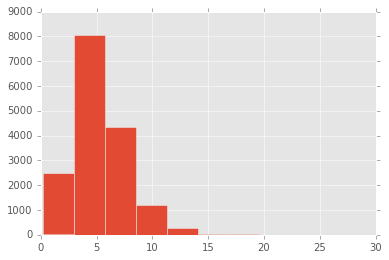

In [203]:
#dataframe for most popular module
ss_rec260pe_df = ss_df[ss_df['Module Model 1'] == 'REC260PE']
ss_rec260pe_df['System Size DC'].hist()

In [41]:
#ols models
import statsmodels.formula.api as sm

In [109]:
#rename columns - no spaces
ss_rec260pe_df=ss_rec260pe_df.rename(columns={"System Size DC": "System_Size_DC", "Total System Cost":"Total_System_Cost"})
ss_rec260pe_df=ss_rec260pe_df.rename(columns={"Module Quantity 1": "Module_Quantity_1", "Service Zip": "Service_Zip", "Inverter Model 1":"Inverter_Model_1"})
ss_rec260pe_df=ss_rec260pe_df.rename(columns={"Inverter Quantity 1": "Inverter_Quantity_1"})

In [146]:
#rename columns - no spaces
ss_rec260pe_df=ss_rec260pe_df.rename(columns={"Customer Sector": "Customer_Sector"})
ss_rec260pe_df=ss_rec260pe_df.rename(columns={"System Size AC": "System_Size_AC"})
ss_rec260pe_df=ss_rec260pe_df.rename(columns={"Service County": "Service_County"})
ss_rec260pe_df=ss_rec260pe_df.rename(columns={"Service City": "Service_City"})
ss_rec260pe_df=ss_rec260pe_df.rename(columns={"Installer Zip": "Installer_Zip"})

In [147]:
#short data set for ols estimation
ss_rec260pe_df_short = ss_rec260pe_df[['Total_System_Cost', 'System_Size_DC', 'System_Size_AC', 'Service_Zip', 'Inverter_Model_1', 'Module_Quantity_1', \
                                       'Inverter_Quantity_1', 'Tracking', 'Customer_Sector', 'Utility', 'Service_County', 'Service_City', 'Installer_Zip']]
ss_rec260pe_df_ols = ss_rec260pe_df_short.dropna()
ss_rec260pe_df_ols = ss_rec260pe_df_ols.copy()
#drop rows with at least one zero
ss_rec260pe_df_ols = ss_rec260pe_df_ols[(ss_rec260pe_df_ols.T != 0).all()]
ss_rec260pe_df_ols = ss_rec260pe_df_ols[(ss_rec260pe_df_ols["Service_Zip"] > 10000.0)]
ss_rec260pe_df_ols["Service_Zip_Cat"] = ss_rec260pe_df_ols["Service_Zip"].astype(int).astype('category')
ss_rec260pe_df_ols["Inverter_Model_1_Cat"] = ss_rec260pe_df_ols["Inverter_Model_1"].astype('category')
ss_rec260pe_df_ols["Tracking_Cat"] = ss_rec260pe_df_ols["Tracking"].astype('category')
ss_rec260pe_df_ols["Utility_Cat"] = ss_rec260pe_df_ols["Utility"].astype('category')
#create dummies for zip code, not used for now
ss_rec260pe_df_ols_dummies = pd.get_dummies(ss_rec260pe_df_ols["Service_Zip_Cat"], prefix='zipd')

In [196]:
#model for System cost, drop outliers
ss_rec260pe_df_ols['System_Size_DC_Sqr'] = ss_rec260pe_df_ols['System_Size_DC'] * ss_rec260pe_df_ols['System_Size_DC']
ss_rec260pe_df_ols['Big_Project'] = np.sign(ss_rec260pe_df_ols['Total_System_Cost'] - 180000)
res = sm.ols(formula="Total_System_Cost~System_Size_DC+System_Size_DC_Sqr+Module_Quantity_1+C(Utility)+C(Inverter_Model_1)", \
             data=ss_rec260pe_df_ols[ss_rec260pe_df_ols['Total_System_Cost'] < 180000]).fit()
#model for outliers, not used, not enough data
#res = sm.ols(formula="Total_System_Cost~System_Size_DC+System_Size_DC_Sqr+Module_Quantity_1+C(Utility)", \
#             data=ss_rec260pe_df_ols[ss_rec260pe_df_ols['Total_System_Cost'] >= 180000]).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      Total_System_Cost   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     871.0
Date:                Wed, 30 Mar 2016   Prob (F-statistic):               0.00
Time:                        20:07:47   Log-Likelihood:                -23414.
No. Observations:                2527   AIC:                         4.697e+04
Df Residuals:                    2457   BIC:                         4.738e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------

/Users/wilfeli/anaconda/envs/datas/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


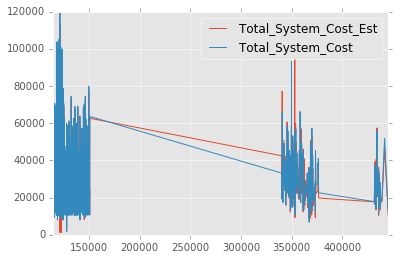

In [195]:
#graph predictions
predictions = res.predict(ss_rec260pe_df_ols[ss_rec260pe_df_ols['Total_System_Cost'] < 180000])
ss_rec260pe_df_ols[ss_rec260pe_df_ols['Total_System_Cost'] < 180000]['Total_System_Cost_Est'] = predictions
ss_rec260pe_df_ols[['Total_System_Cost_Est', 'Total_System_Cost']][ss_rec260pe_df_ols['Total_System_Cost'] < 180000].plot()

In [202]:
#model for system size, drop outliers
res = sm.ols(formula="System_Size_DC~Module_Quantity_1+C(Inverter_Model_1_Cat)+Inverter_Quantity_1", \
             data=ss_rec260pe_df_ols[ss_rec260pe_df_ols['Total_System_Cost'] < 180000]).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         System_Size_DC   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     184.8
Date:                Thu, 31 Mar 2016   Prob (F-statistic):               0.00
Time:                        08:59:08   Log-Likelihood:                -3414.6
No. Observations:                2527   AIC:                             6963.
Df Residuals:                    2460   BIC:                             7354.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                                                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------

In [133]:
#look at correlations
ss_rec260pe_df_ols.corr()

,Total_System_Cost,System_Size_DC,System_Size_AC,Service_Zip,Module_Quantity_1,Inverter_Quantity_1
Total_System_Cost,1.000000,0.805893,0.806314,0.067019,0.735560,0.082811
System_Size_DC,0.805893,1.000000,0.999570,0.060908,0.861251,0.108892
System_Size_AC,0.806314,0.999570,1.000000,0.066386,0.861484,0.107294
Service_Zip,0.067019,0.060908,0.066386,1.000000,-0.030377,-0.002195
Module_Quantity_1,0.735560,0.861251,0.861484,-0.030377,1.000000,0.087394
Inverter_Quantity_1,0.082811,0.108892,0.107294,-0.002195,0.087394,1.000000


In [134]:
#look at correlations
ss_rec260pe_df.corr()

,Service_Zip,System_Size_DC,System_Size_AC,Installer Zip,Electric Vehicle Count,Total_System_Cost,Itc Cost Basis,Module_Quantity_1,Module Quantity 2,Module Quantity 3,...,Inverter Quantity 3,Inverter Quantity 4,Inverter Quantity 5,Inverter Quantity 6,Inverter Quantity 7,Inverter Quantity 8,Inverter Quantity 9,Inverter Quantity 10,Inverter Quantity 11,App Complete Date Year
Service_Zip,1.000000,0.048093,0.049125,-0.062579,0.930721,0.031688,-0.000660,-0.005909,-0.043831,0.917528,...,0.156071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011291
System_Size_DC,0.048093,1.000000,0.999782,-0.016928,-0.129095,0.341983,0.066864,0.861946,0.565768,-0.210765,...,0.593014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038708
System_Size_AC,0.049125,0.999782,1.000000,-0.020167,-0.038058,0.344918,0.067087,0.862096,0.565141,-0.212774,...,0.595912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.039618
Installer Zip,-0.062579,-0.016928,-0.020167,1.000000,-0.847558,0.052609,-0.021628,-0.037569,0.084705,-1.000000,...,0.091921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.071560
Electric Vehicle Count,0.930721,-0.129095,-0.038058,-0.847558,1.000000,-0.000851,0.081766,-0.066836,-0.521620,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192707
Total_System_Cost,0.031688,0.341983,0.344918,0.052609,-0.000851,1.000000,0.022261,0.639580,-0.044601,NaN,...,0.091201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.070253
Itc Cost Basis,-0.000660,0.066864,0.067087,-0.021628,0.081766,0.022261,1.000000,0.067320,0.108395,-0.215650,...,0.210351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001482
Module_Quantity_1,-0.005909,0.861946,0.862096,-0.037569,-0.066836,0.639580,0.067320,1.000000,0.194038,-0.447920,...,0.532104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000532
Module Quantity 2,-0.043831,0.565768,0.565141,0.084705,-0.521620,-0.044601,0.108395,0.194038,1.000000,-0.226277,...,0.467093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064084
Module Quantity 3,0.917528,-0.210765,-0.212774,-1.000000,NaN,NaN,-0.215650,-0.447920,-0.226277,1.000000,...,0.577350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.312586
